<a href="https://colab.research.google.com/github/ephantus9/ephantuswa/blob/main/Neural_network1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [1]:
pip install -q tensorflow tensorflow-datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
tfds.disable_progress_bar()

Find Datasets


In [3]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

## Get information on the data`

In [4]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock

## Prepare Rock Paper scissors Data


In [5]:
ds_train = tfds.load(name='rock_paper_scissors', split='train')
ds_test = tfds.load(name='rock_paper_scissors', split='test')

## Show examples

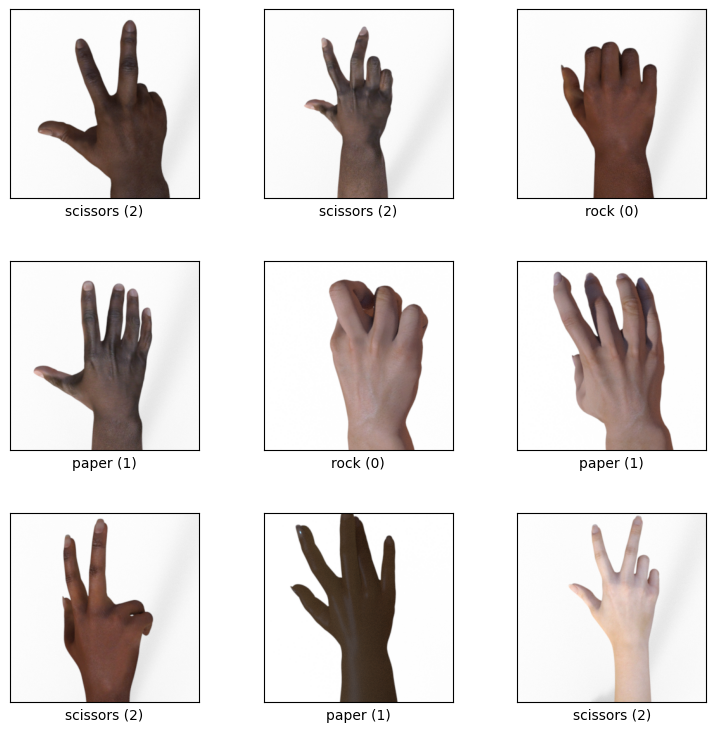

In [6]:
fig = tfds.show_examples(ds_train, info)

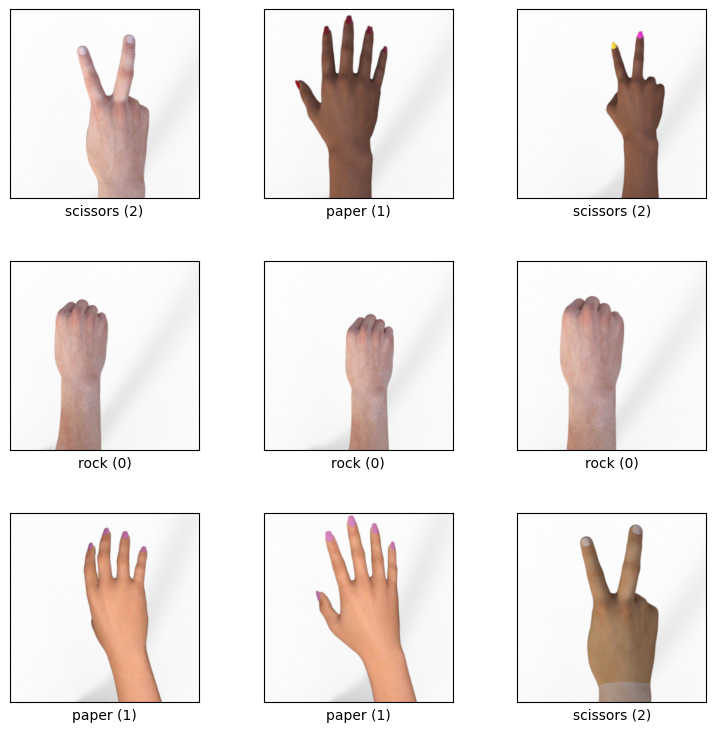

In [7]:
fig = tfds.show_examples(ds_test, info)

## Additional data Prep

In [8]:
train_images = np.array([example['image'].numpy()[:,:,0]for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0]for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [9]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images/=225
test_images /=225

In [10]:
train_images[0]

array([[[1.1288888],
        [1.1244445],
        [1.1288888],
        ...,
        [1.1155555],
        [1.1111112],
        [1.1111112]],

       [[1.1288888],
        [1.1288888],
        [1.1244445],
        ...,
        [1.1111112],
        [1.1155555],
        [1.1066667]],

       [[1.1288888],
        [1.1288888],
        [1.1288888],
        ...,
        [1.1155555],
        [1.1111112],
        [1.12     ]],

       ...,

       [[1.12     ],
        [1.1155555],
        [1.12     ],
        ...,
        [1.0977777],
        [1.1066667],
        [1.1022222]],

       [[1.1244445],
        [1.1244445],
        [1.1155555],
        ...,
        [1.1022222],
        [1.1022222],
        [1.1022222]],

       [[1.12     ],
        [1.1244445],
        [1.12     ],
        ...,
        [1.1022222],
        [1.0977777],
        [1.1111112]]], dtype=float32)

In [11]:
train_images[0].shape

(300, 300, 1)

In [12]:
type(train_images[0])
train_images.shape

(2520, 300, 300, 1)

##Train a network(basic approach)

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation ='relu'),
    keras.layers.Dense(256, activation ='relu'),
    keras.layers.Dense(3, activation='softmax')

  ])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.3580 - loss: 54.0754
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5903 - loss: 2.5519
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7268 - loss: 1.0916
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8436 - loss: 0.4667
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9130 - loss: 0.2249


In [14]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5250 - loss: 3.2164


[3.373079776763916, 0.5]

##Train a network (convolutional approach)

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 358ms/step - accuracy: 0.5346 - loss: 15.9913
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.9752 - loss: 0.1666
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.9974 - loss: 0.0471
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.9462 - loss: 0.2626
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.9987 - loss: 0.0123


In [16]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 558ms/step - accuracy: 0.5610 - loss: 1.7455


[1.955581784248352, 0.5537634491920471]

## A better convolutional Network

In [17]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
    keras.layers.Conv2D(64,3, activation ='relu'),
    keras.layers.Conv2D(32,3, activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')

])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.4671 - loss: 1.6788
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9503 - loss: 0.1963
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9873 - loss: 0.0483
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9958 - loss: 0.0154
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9958 - loss: 0.0172


In [18]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6784 - loss: 0.9075


[0.9075698256492615, 0.6827957034111023]

## Hyperperameter turning

In [19]:
pip install -U keras-tuner

In [20]:
from kerastuner.tuners import RandomSearch
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1))),

  model.add(keras.layers.Conv2D(64, 3, activation = 'relu'))
  model.add(keras.layers.Conv2D(32, 3, activation = 'relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice('Dense layer', [64,128,256,512,1024]), activation='relu'))
  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

tuner = RandomSearch(
      build_model,
      objective='val_accuracy',
      max_trials=32,

  )

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Reloading Tuner from ./untitled_project/tuner0.json


/tmp/ipython-input-3059557077.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [21]:
from kerastuner.tuners import RandomSearch
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1))),

  model.add(keras.layers.Conv2D(64, 3, activation = 'relu'))
  model.add(keras.layers.Conv2D(32, 3, activation = 'relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice('Dense layer', [64,128,256,512,1024]), activation='relu'))
  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

tuner = RandomSearch(
      build_model,
      objective='val_accuracy',
      max_trials=32,

  )

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Reloading Tuner from ./untitled_project/tuner0.json


In [22]:
best_model = tuner.get_best_models()[0]


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
best_model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3332 - loss: 1.6157


[1.6033858060836792, 0.3333333432674408]

In [24]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ average_pooling2d               │ (None, 99, 99, 1)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 97, 97, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 95, 95, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 70688)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,524,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,543,395 (17.33 MB)

 Trainable params: 4,543,395 (17.33 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
Dense layer: 64
Score: 0.3333333432674408

Trial 02 summary
Hyperparameters:
Dense layer: 128
Score: 0.3333333432674408

Trial 00 summary
Hyperparameters:
Dense layer: 256
Score: 0.3333333432674408

Trial 01 summary
Hyperparameters:
Dense layer: 1024
Score: 0.3333333432674408

Trial 04 summary
Hyperparameters:
Dense layer: 512
Score: 0.3333333432674408


## Save & load our models

In [26]:
best_model.save('./my_model.h5')

In [27]:
loaded_model = keras.models.load_model('./my_model.h5')

In [28]:
loaded_model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3332 - loss: 1.6157


[1.6033858060836792, 0.3333333432674408]

plot image from Numpy Array

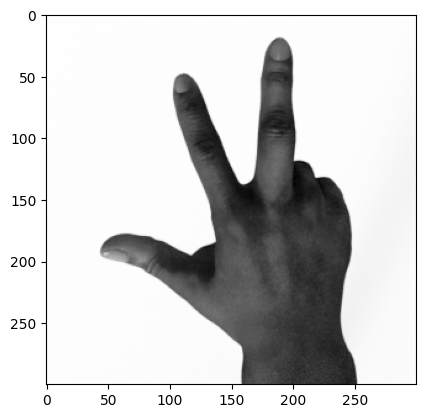

In [29]:
rgb_image=np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_image[0]

image=train_images[0].reshape(300,300)
plt.imshow(train_images[0],cmap='Greys_r')

## Convert PNG/JPG images to numpy format

/tmp/ipython-input-95601255.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im=imageio.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRu5bcvV6CcSgBJJttfFwBm5i8ZNZ2HlAHN5Q&s')


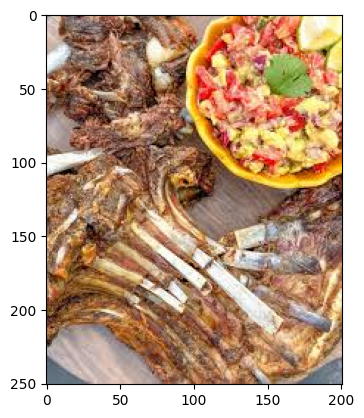

In [30]:
import imageio

im=imageio.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRu5bcvV6CcSgBJJttfFwBm5i8ZNZ2HlAHN5Q&s')

plt.imshow(im)

In [31]:
print(type(im))
im_np = np.asarray(im)

<class 'numpy.ndarray'>


In [32]:
print(im_np.shape)

(251, 201, 3)
